# Clase 1: Análisis de acciones

[Juan Diego Sánchez Torres](https://www.researchgate.net/profile/Juan_Diego_Sanchez_Torres), 

*Profesor*, [MAF ITESO](http://maf.iteso.mx/web/general/detalle?group_id=5858156)

+ Departamento de Matemáticas y Física
+ dsanchez@iteso.mx
+ Tel. 3669-34-34 Ext. 3069
+ Oficina: Cubículo 4, Edificio J, 2do piso

# 1. El uso de Pandas para bajar datos de Yahoo! Finance

En primer lugar, para poder bajar precios de Yahoo, es necesario cargar algunos paquetes de Python. En este caso, el paquete principal será Pandas. También, se usará el Matplotlib para hacer gráficos de las series de datos

In [176]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

Una vez cargados los paquetes, es necesario definir los tickers de las acciones que se usarán, la fuente de descarga (Yahoo en este caso, pero también se puede desde Google) y las fechas de interés. Con esto, la función *DataReader* del paquete *pandas_datareader* bajará los precios solicitados.

In [3]:
#Descargar datos de Yahoo! finance
#Tickers 
tickers = ['AA','AAPL','MSFT', '^GSPC']
# Fuente
data_source = 'yahoo'
# Fechas: desde 01/01/2014 hasta 12/31/2016.
start_date = '2014-01-01'
end_date = '2016-12-31'
# Usar el pandas data reader
assets = web.DataReader(tickers, data_source, start_date, end_date)

Como se puede notar, en este caso se consideran tres activos (Alcoa, Apple y Microsoft) y, el índice S&P500. Todos almacenados en la variable *assets*.

In [4]:
assets

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 756 (major_axis) x 4 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2016-12-30 00:00:00 to 2014-01-02 00:00:00
Minor_axis axis: AA to ^GSPC

El objeto *assets* tiene tres características: *items*, *major_axis* y *minor_axis*. Con estos, se pueden encontrar todos los registros almacenados.

In [5]:
assets.items


Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [6]:
assets.minor_axis


Index(['AA', 'AAPL', 'MSFT', '^GSPC'], dtype='object')

In [7]:
assets.major_axis

DatetimeIndex(['2016-12-30', '2016-12-29', '2016-12-28', '2016-12-27',
               '2016-12-23', '2016-12-22', '2016-12-21', '2016-12-20',
               '2016-12-19', '2016-12-16',
               ...
               '2014-01-15', '2014-01-14', '2014-01-13', '2014-01-10',
               '2014-01-09', '2014-01-08', '2014-01-07', '2014-01-06',
               '2014-01-03', '2014-01-02'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None)

De esta forma, es ordenar y acceder a los datos de una forma simple e intuitiva. Por ejemplo: los precios de cierre de Microsoft.

In [8]:
assets['Adj Close']['MSFT']

Date
2016-12-30    61.414
2016-12-29    62.165
2016-12-28    62.254
2016-12-27    62.540
2016-12-23    62.501
               ...  
2014-01-08    32.594
2014-01-07    33.186
2014-01-06    32.931
2014-01-03    33.642
2014-01-02    33.870
Name: MSFT, Length: 756, dtype: float64

O, los precios de apertura de Apple

In [9]:
assets['Open']['AAPL']

Date
2016-12-30    116.650
2016-12-29    116.450
2016-12-28    117.520
2016-12-27    116.520
2016-12-23    115.590
               ...   
2014-01-08     76.973
2014-01-07     77.760
2014-01-06     76.779
2014-01-03     78.980
2014-01-02     79.383
Name: AAPL, Length: 756, dtype: float64

También, los precios de cierre en la fecha *2014-01-14*

In [10]:
assets['Close']['2014-01-14']

                AA    AAPL   MSFT    ^GSPC
Date                                      
2014-01-14  24.799  78.056  35.78  1838.88

Que también se obtienen mediante

In [11]:
assets.major_xs('2014-01-14')['Close']

                AA    AAPL   MSFT    ^GSPC
Date                                      
2014-01-14  24.799  78.056  35.78  1838.88

O, finalmente, los valores del S&P500

In [12]:
assets.minor_xs('^GSPC')

            Adj Close    Close     High      Low     Open     Volume
Date                                                                
2016-12-30    2238.83  2238.83  2253.58  2233.62  2251.61  2.671e+09
2016-12-29    2249.26  2249.26  2254.51  2244.56  2249.50  2.336e+09
2016-12-28    2249.92  2249.92  2271.31  2249.11  2270.23  2.392e+09
2016-12-27    2268.88  2268.88  2273.82  2266.15  2266.23  1.987e+09
2016-12-23    2263.79  2263.79  2263.79  2258.84  2260.25  2.021e+09
...               ...      ...      ...      ...      ...        ...
2014-01-08    1837.49  1837.49  1840.02  1831.40  1837.90  3.652e+09
2014-01-07    1837.88  1837.88  1840.10  1828.71  1828.71  3.512e+09
2014-01-06    1826.77  1826.77  1837.16  1823.73  1832.31  3.295e+09
2014-01-03    1831.37  1831.37  1838.24  1829.13  1833.21  2.774e+09
2014-01-02    1831.98  1831.98  1845.86  1827.74  1845.86  3.081e+09

[756 rows x 6 columns]

De donde, se pueden seleccionar los precios de cierre y ajustados en el cierre

In [40]:
assets.minor_xs('^GSPC')[['Close', 'Adj Close']]

              Close  Adj Close
Date                          
2016-12-30  2238.83    2238.83
2016-12-29  2249.26    2249.26
2016-12-28  2249.92    2249.92
2016-12-27  2268.88    2268.88
2016-12-23  2263.79    2263.79
...             ...        ...
2014-01-08  1837.49    1837.49
2014-01-07  1837.88    1837.88
2014-01-06  1826.77    1826.77
2014-01-03  1831.37    1831.37
2014-01-02  1831.98    1831.98

[756 rows x 2 columns]

# 2. Gráficos de las series de datos

In [14]:
msftA=assets['Adj Close']['MSFT']
msftV=assets['Volume']['MSFT']

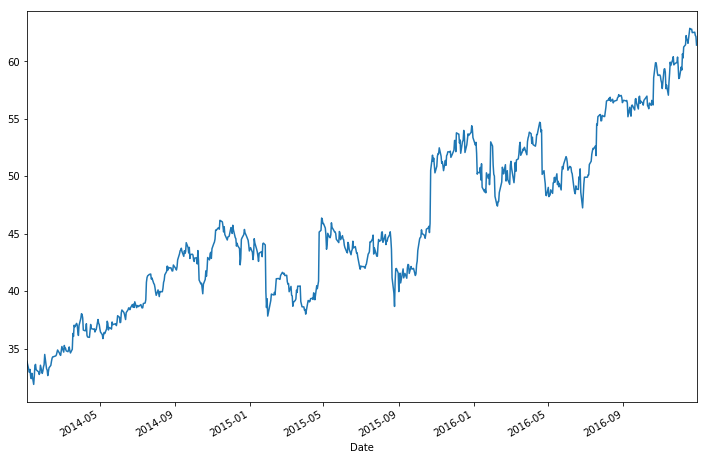

In [15]:
msftA.plot(figsize=(12,8))

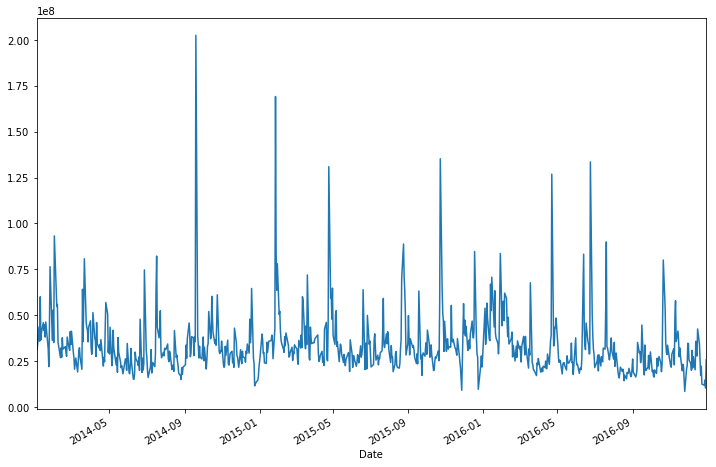

In [16]:
msftV.plot(figsize=(12,8))

In [17]:
allA=assets['Adj Close']

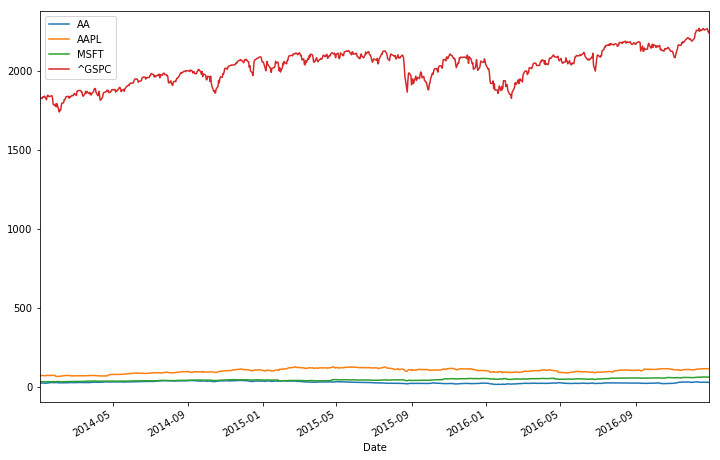

In [18]:
assets['Adj Close'].plot(figsize=(12,8))

In [59]:
allassetsA=assets['Adj Close'][['AA', 'AAPL', 'MSFT']]

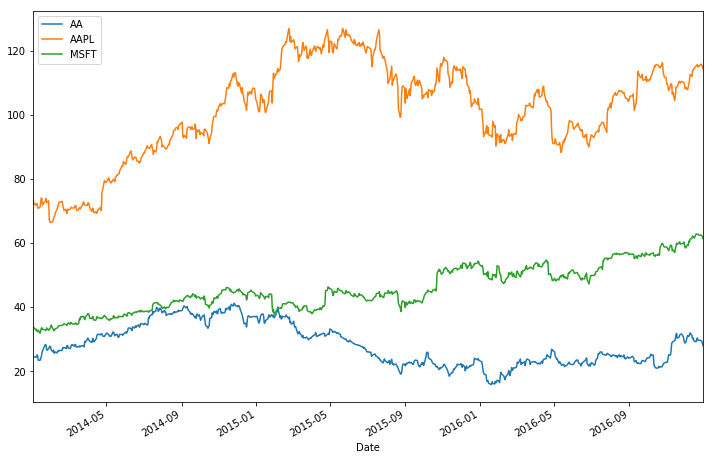

In [60]:
allassetsA.plot(figsize=(12,8))

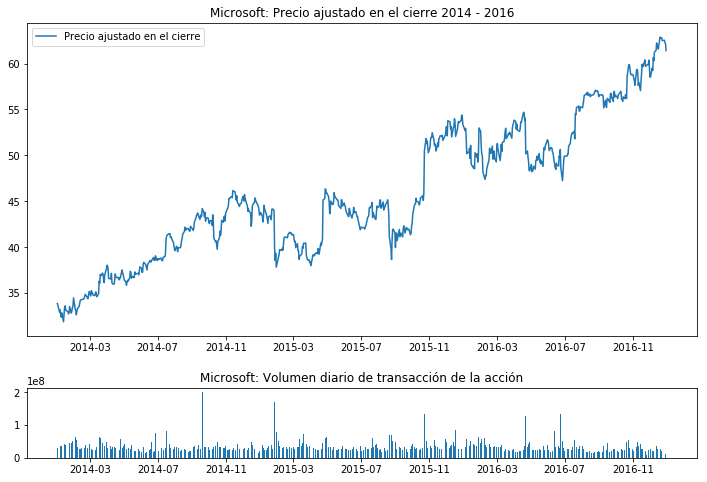

In [69]:
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(msftA.index, msftA, label='Precio ajustado en el cierre')
plt.title('Microsoft: Precio ajustado en el cierre 2014 - 2016')
plt.legend(loc=2)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msftV.index, msftV)
plt.title('Microsoft: Volumen diario de transacción de la acción')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

In [149]:
short_rollmean_msft = msftA.rolling(window=20).mean()
long_rollmean_msft = msftA.rolling(window=100).mean()

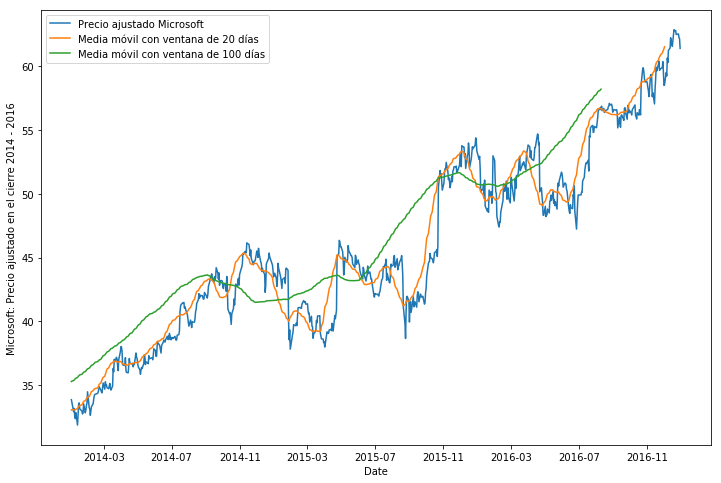

In [150]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msftA.index, msftA, label='Precio ajustado Microsoft')
ax.plot(short_rollmean_msft.index, short_rollmean_msft, label='Media móvil con ventana de 20 días')
ax.plot(long_rollmean_msft.index, long_rollmean_msft, label='Media móvil con ventana de 100 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Precio ajustado en el cierre 2014 - 2016')
ax.legend()

In [132]:
short_rollstd_msft = msftA.rolling(window=20).std()
long_rollstd_msft = msftA.rolling(window=100).std()

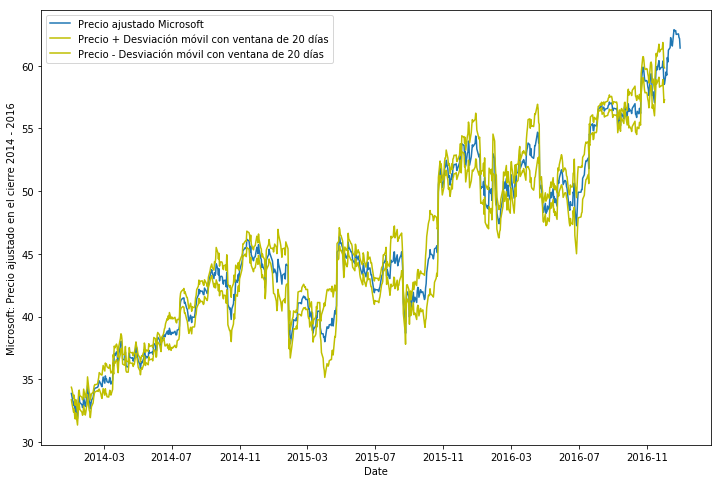

In [151]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msftA.index, msftA, label='Precio ajustado Microsoft')
ax.plot(short_rollstd_msft.index, msftA+short_rollstd_msft, color="y", label='Precio + Desviación móvil con ventana de 20 días')
ax.plot(short_rollstd_msft.index, msftA-short_rollstd_msft, color="y", label='Precio - Desviación móvil con ventana de 20 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Precio ajustado en el cierre 2014 - 2016')
ax.legend()

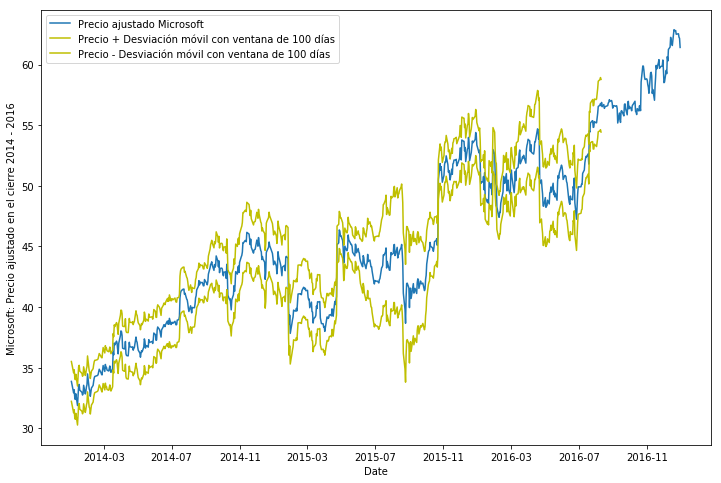

In [156]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msftA.index, msftA, label='Precio ajustado Microsoft')
ax.plot(long_rolling_msft.index, msftA+long_rollstd_msft, color="y", label='Precio + Desviación móvil con ventana de 100 días')
ax.plot(long_rolling_msft.index, msftA-long_rollstd_msft, color="y", label='Precio - Desviación móvil con ventana de 100 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Precio ajustado en el cierre 2014 - 2016')
ax.legend()

# 3. Cálculo de rendimientos

In [198]:
(allA.pct_change())[1:]

                   AA       AAPL       MSFT      ^GSPC
Date                                                  
2016-12-29  2.885e-02  7.857e-03  1.223e-02  4.659e-03
2016-12-28  1.869e-02  2.570e-04  1.431e-03  2.934e-04
2016-12-27  7.475e-03  4.282e-03  4.604e-03  8.427e-03
2016-12-23  2.024e-03 -6.311e-03 -6.320e-04 -2.243e-03
2016-12-22  1.346e-03 -1.974e-03  4.902e-03 -1.250e-03
...               ...        ...        ...        ...
2014-01-08  1.310e-02  1.294e-02  6.473e-03 -3.482e-04
2014-01-07 -2.678e-02 -6.293e-03  1.818e-02  2.123e-04
2014-01-06 -9.488e-04  7.203e-03 -7.690e-03 -6.045e-03
2014-01-03  3.799e-03 -5.423e-03  2.159e-02  2.518e-03
2014-01-02 -3.784e-03  2.246e-02  6.773e-03  3.331e-04

[755 rows x 4 columns]

In [197]:
R = ((allA - allA.shift(1))/allA)[1:]
R

                   AA       AAPL       MSFT      ^GSPC
Date                                                  
2016-12-29  2.804e-02  7.796e-03  1.208e-02  4.637e-03
2016-12-28  1.835e-02  2.570e-04  1.429e-03  2.933e-04
2016-12-27  7.420e-03  4.264e-03  4.583e-03  8.357e-03
2016-12-23  2.019e-03 -6.351e-03 -6.324e-04 -2.248e-03
2016-12-22  1.345e-03 -1.978e-03  4.878e-03 -1.252e-03
...               ...        ...        ...        ...
2014-01-08  1.293e-02  1.277e-02  6.431e-03 -3.483e-04
2014-01-07 -2.751e-02 -6.333e-03  1.785e-02  2.122e-04
2014-01-06 -9.497e-04  7.151e-03 -7.750e-03 -6.082e-03
2014-01-03  3.784e-03 -5.453e-03  2.113e-02  2.512e-03
2014-01-02 -3.799e-03  2.197e-02  6.728e-03  3.330e-04

[755 rows x 4 columns]

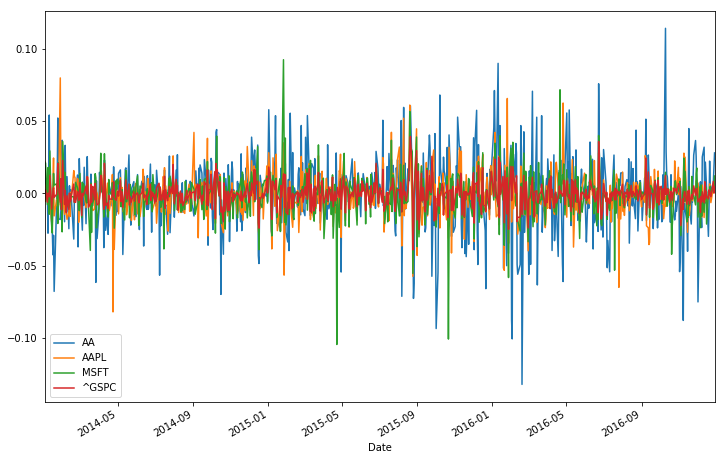

In [164]:
R.plot(figsize=(12,8))

In [199]:
r=np.log(1+R)
r

                   AA       AAPL       MSFT      ^GSPC
Date                                                  
2016-12-29  2.765e-02  7.766e-03  1.201e-02  4.626e-03
2016-12-28  1.818e-02  2.569e-04  1.428e-03  2.933e-04
2016-12-27  7.393e-03  4.255e-03  4.572e-03  8.322e-03
2016-12-23  2.017e-03 -6.371e-03 -6.326e-04 -2.251e-03
2016-12-22  1.344e-03 -1.980e-03  4.866e-03 -1.252e-03
...               ...        ...        ...        ...
2014-01-08  1.284e-02  1.269e-02  6.411e-03 -3.484e-04
2014-01-07 -2.790e-02 -6.353e-03  1.769e-02  2.122e-04
2014-01-06 -9.501e-04  7.126e-03 -7.780e-03 -6.100e-03
2014-01-03  3.777e-03 -5.468e-03  2.091e-02  2.509e-03
2014-01-02 -3.806e-03  2.173e-02  6.705e-03  3.329e-04

[755 rows x 4 columns]

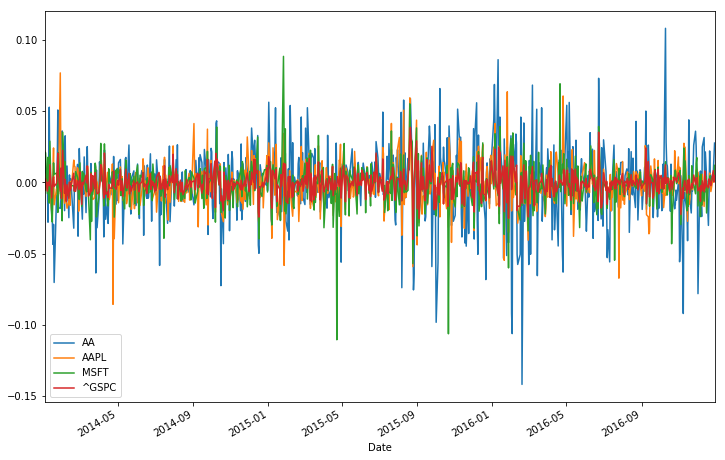

In [201]:
r.plot(figsize=(12,8))

In [202]:
R.describe()

              AA       AAPL       MSFT      ^GSPC
count  7.550e+02  7.550e+02  7.550e+02  7.550e+02
mean  -4.848e-04 -6.999e-04 -8.984e-04 -3.014e-04
std    2.470e-02  1.511e-02  1.486e-02  8.448e-03
min   -1.321e-01 -8.198e-02 -1.045e-01 -3.903e-02
25%   -1.240e-02 -8.705e-03 -7.770e-03 -4.758e-03
50%    0.000e+00 -7.550e-04 -3.473e-04 -2.882e-04
75%    1.330e-02  6.592e-03  6.558e-03  3.541e-03
max    1.142e-01  7.993e-02  9.253e-02  3.941e-02

In [203]:
r.describe()

              AA       AAPL       MSFT      ^GSPC
count  7.550e+02  7.550e+02  7.550e+02  7.550e+02
mean  -7.920e-04 -8.143e-04 -1.010e-03 -3.370e-04
std    2.485e-02  1.512e-02  1.494e-02  8.441e-03
min   -1.417e-01 -8.554e-02 -1.104e-01 -3.982e-02
25%   -1.247e-02 -8.743e-03 -7.800e-03 -4.770e-03
50%    0.000e+00 -7.553e-04 -3.474e-04 -2.882e-04
75%    1.321e-02  6.571e-03  6.537e-03  3.535e-03
max    1.082e-01  7.689e-02  8.850e-02  3.866e-02

In [204]:
Rmsft=(msftA.pct_change())[1:]
Rmsft

Date
2016-12-29    1.223e-02
2016-12-28    1.431e-03
2016-12-27    4.604e-03
2016-12-23   -6.320e-04
2016-12-22    4.902e-03
                ...    
2014-01-08    6.473e-03
2014-01-07    1.818e-02
2014-01-06   -7.690e-03
2014-01-03    2.159e-02
2014-01-02    6.773e-03
Name: MSFT, Length: 755, dtype: float64

In [144]:
short_rollmean_Rmsft = Rmsft.rolling(window=20).mean()
long_rollmean_Rmsft = Rmsft.rolling(window=100).mean()
short_rollstd_Rmsft = Rmsft.rolling(window=20).std()
long_rollstd_Rmsft = Rmsft.rolling(window=100).std()

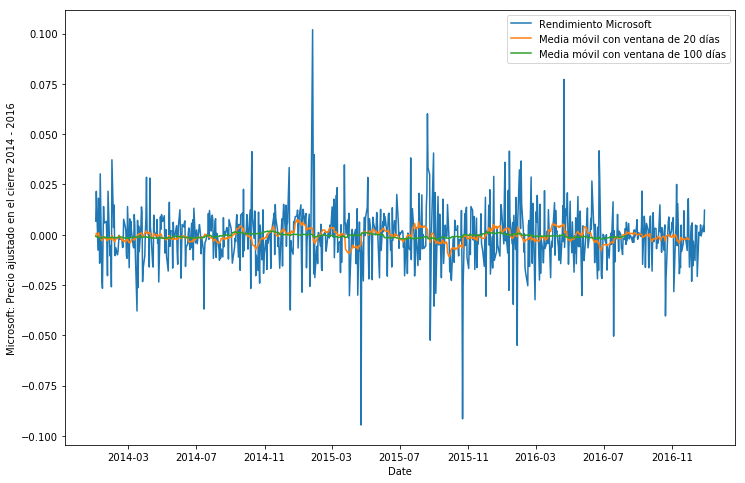

In [147]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label='Rendimiento Microsoft')
ax.plot(short_rollmean_Rmsft.index, short_rollmean_Rmsft, label='Media móvil con ventana de 20 días')
ax.plot(long_rollmean_Rmsft.index, long_rollmean_Rmsft, label='Media móvil con ventana de 100 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Rendimientos 2014 - 2016')
ax.legend()

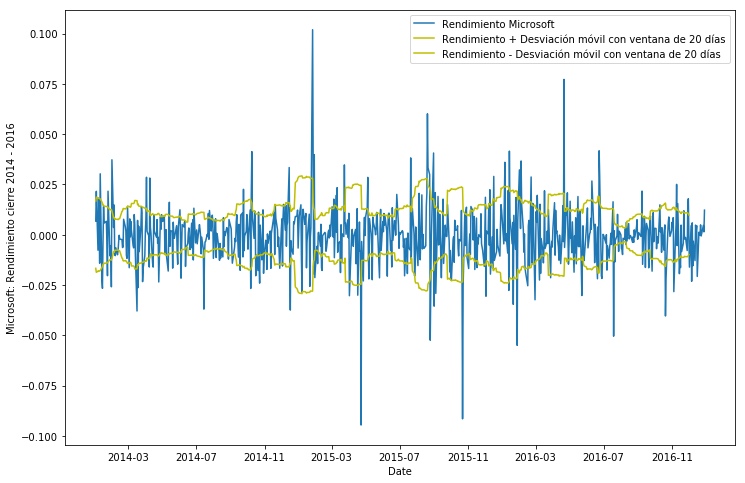

In [155]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label='Rendimiento Microsoft')
ax.plot(short_rollstd_Rmsft.index, short_rollstd_Rmsft, color="y", label='Desviación móvil con ventana de 20 días')
ax.plot(short_rollstd_Rmsft.index, -short_rollstd_Rmsft, color="y", label='- Desviación móvil con ventana de 20 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Rendimiento cierre 2014 - 2016')
ax.legend()

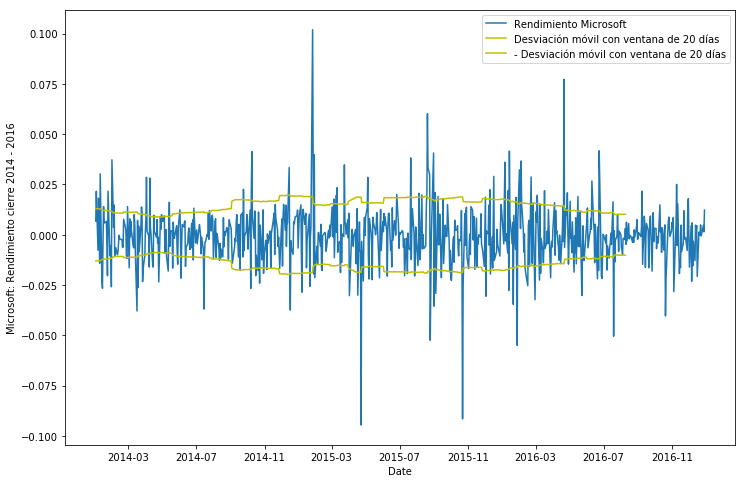

In [157]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label='Rendimiento Microsoft')
ax.plot(long_rollstd_Rmsft.index, long_rollstd_Rmsft, color="y", label='Desviación móvil con ventana de 20 días')
ax.plot(long_rollstd_Rmsft.index, -long_rollstd_Rmsft, color="y", label='- Desviación móvil con ventana de 20 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Rendimiento cierre 2014 - 2016')
ax.legend()

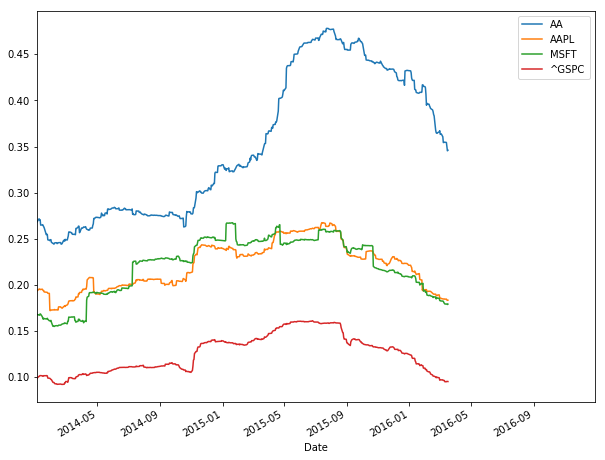

In [205]:
min_periods = 200
vol = R.rolling(window=min_periods).std()*np.sqrt(min_periods)
vol.plot(figsize=(10, 8))

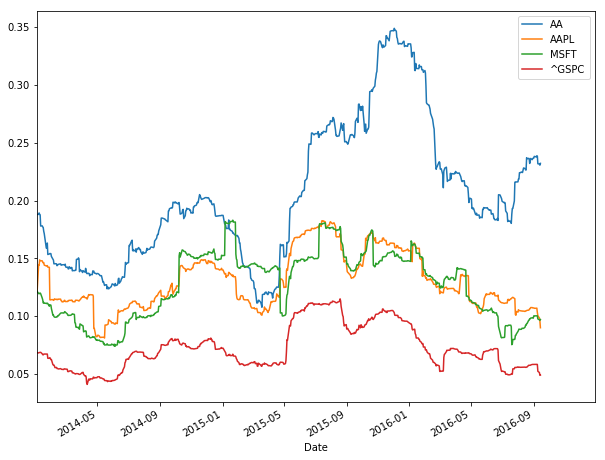

In [190]:
min_periods = 75 
vol = r.rolling(window=min_periods).std()*np.sqrt(min_periods)
vol.plot(figsize=(10, 8))

In [162]:
Rcum = (1 + R).cumprod()
Rcum

               AA   AAPL   MSFT  ^GSPC
Date                                  
2016-12-29  1.028  1.008  1.012  1.005
2016-12-28  1.047  1.008  1.014  1.005
2016-12-27  1.055  1.012  1.018  1.013
2016-12-23  1.057  1.006  1.018  1.011
2016-12-22  1.058  1.004  1.022  1.010
...           ...    ...    ...    ...
2014-01-08  0.566  0.532  0.449  0.778
2014-01-07  0.550  0.528  0.457  0.778
2014-01-06  0.550  0.532  0.454  0.773
2014-01-03  0.552  0.529  0.463  0.775
2014-01-02  0.550  0.541  0.467  0.775

[755 rows x 4 columns]

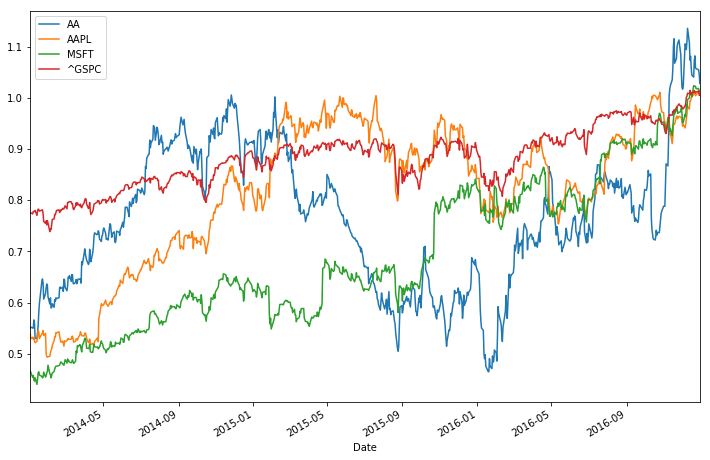

In [166]:
Rcum.plot(figsize=(12,8))

In [206]:
rcum = np.log(Rcum+1)
rcum

               AA   AAPL   MSFT  ^GSPC
Date                                  
2016-12-29  0.707  0.697  0.699  0.695
2016-12-28  0.716  0.697  0.700  0.696
2016-12-27  0.720  0.699  0.702  0.700
2016-12-23  0.721  0.696  0.702  0.699
2016-12-22  0.722  0.695  0.704  0.698
...           ...    ...    ...    ...
2014-01-08  0.449  0.426  0.371  0.575
2014-01-07  0.439  0.424  0.377  0.575
2014-01-06  0.438  0.427  0.374  0.573
2014-01-03  0.440  0.425  0.381  0.574
2014-01-02  0.438  0.432  0.383  0.574

[755 rows x 4 columns]

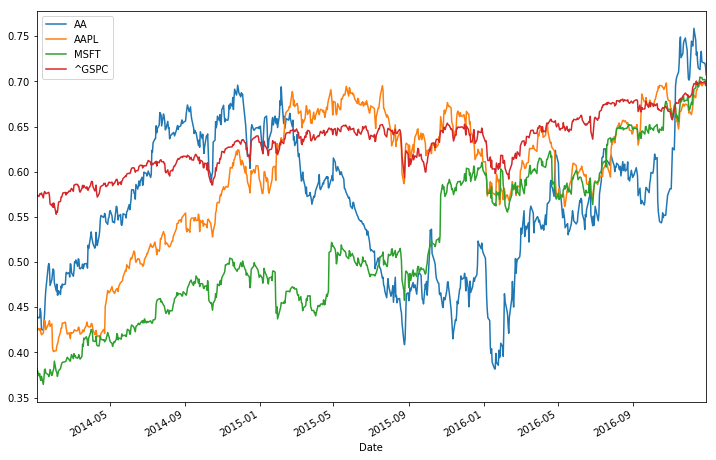

In [207]:
rcum.plot(figsize=(12,8))

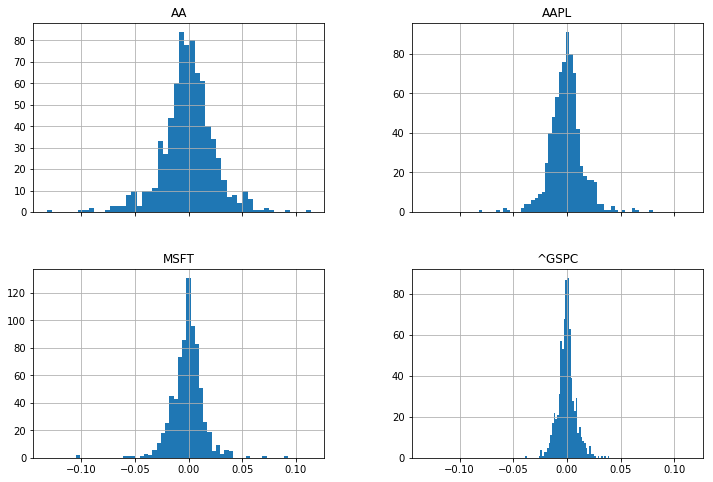

In [208]:
R.hist(bins=50, sharex=True, figsize=(12,8));

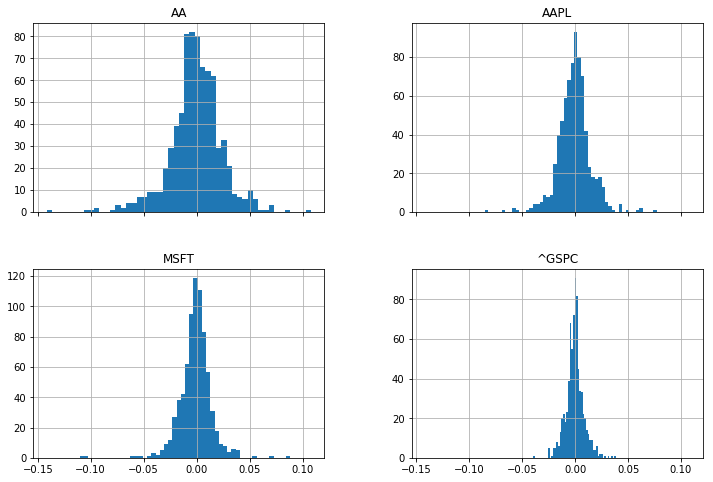

In [209]:
r.hist(bins=50, sharex=True, figsize=(12,8));

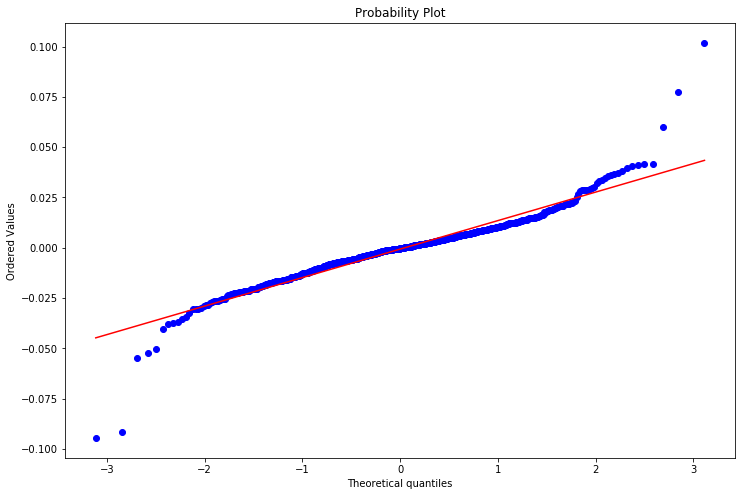

In [178]:
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(Rmsft, dist='norm', plot=ax)
plt.show();

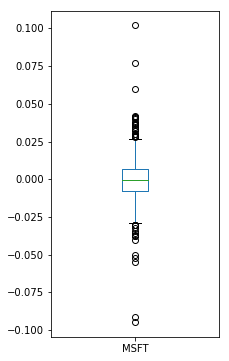

In [192]:
Rmsft.plot(kind='box', figsize=(3,6));

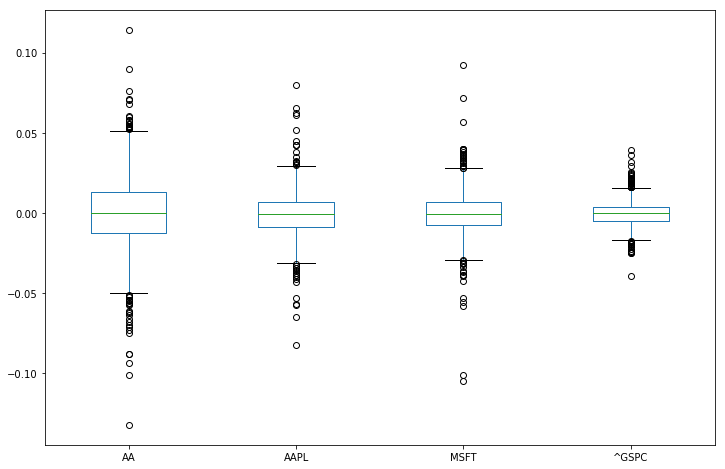

In [193]:
R.plot(kind='box', figsize=(12,8));

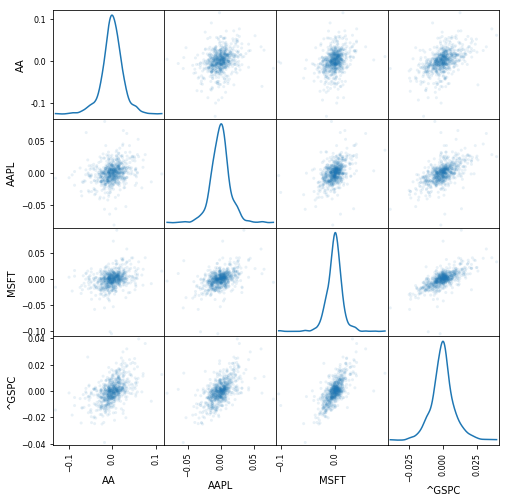

In [194]:
pd.plotting.scatter_matrix(R, diagonal='kde', alpha=0.1, figsize=(8,8));